In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from src.DeepRock.utils import get_data
from sklearn import metrics
from src.DeepRock.utils import plot_confusion_matrix
import glob

#### randomly sample from three blocks

In [16]:
trn_num = 100000 # 100000
tst_num = 10000 # 10000

In [3]:
# select train and test pixels
trn_Xids = sorted(glob.glob('./data/block1/train/X/*.npy') + glob.glob('./data/block2/train/X/*.npy') + glob.glob('./data/block3/train/X/*.npy'))
trn_Yids = sorted(glob.glob('./data/block1/train/Y/*.npy') + glob.glob('./data/block2/train/Y/*.npy') + glob.glob('./data/block3/train/Y/*.npy'))
tst_Xids = sorted(glob.glob('./data/block1/test/X/*.npy') + glob.glob('./data/block2/test/X/*.npy') + glob.glob('./data/block3/test/X/*.npy'))
tst_Yids = sorted(glob.glob('./data/block1/test/Y/*.npy') + glob.glob('./data/block2/test/Y/*.npy') + glob.glob('./data/block3/test/Y/*.npy'))

In [17]:
trn_X, trn_Y = get_data(trn_Xids, trn_Yids, trn_num)
tst_X, tst_Y = get_data(tst_Xids, tst_Yids, tst_num)

In [18]:
cls_names = ['Vegetation', 'Unkown Rocks', 'Carbonate_sediment',
           'Dolerite', 'Feldspathic_sediment', 'Felsic_volcanic', 'Gneiss', 'Granite', 'Mafic_volcanic', 'Quartz_sediment']

#### random forest classifier

In [6]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

In [19]:
clf.fit(trn_X[:, :10], trn_Y)
p1 = clf.predict(tst_X[:, :10])
clf.fit(trn_X[:, :16], trn_Y)
p2 = clf.predict(tst_X[:, :16])
clf.fit(trn_X[:, :], trn_Y)
p3 = clf.predict(tst_X[:, :])

In [20]:
pr1, re1, fs1, s1 = metrics.precision_recall_fscore_support(tst_Y, p1)
pr2, re2, fs2, s2 = metrics.precision_recall_fscore_support(tst_Y, p2)
pr3, re3, fs3, s3 = metrics.precision_recall_fscore_support(tst_Y, p3)

/Users/chenyz/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/chenyz/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [21]:
np.unique(tst_Y)

array([ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

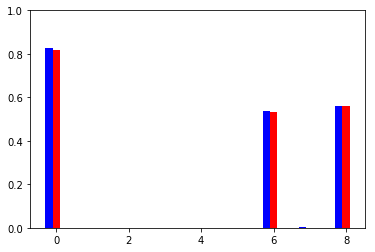

In [23]:
ax = plt.subplot(111)
plt.ylim(0., 1.)
ax.bar(np.arange(9)-0.2, fs1[:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(9), fs2[:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(9)+0.2, fs3[:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(9), cls_names[:9], rotation=90)
plt.ylabel('accuarcy')
plt.gca().yaxis.grid(True)
plt.title('f1 score for each lithological class')
plt.legend()

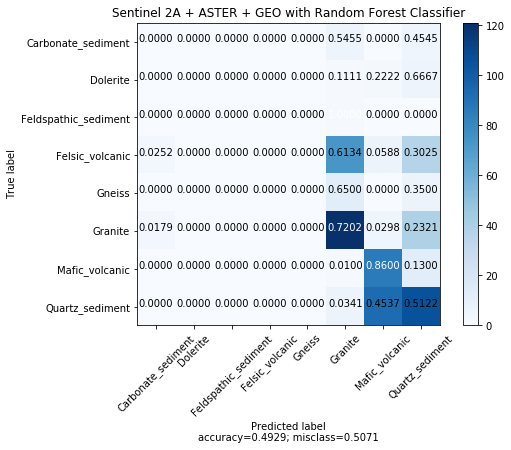

In [31]:
cm = metrics.confusion_matrix(tst_Y, preds, labels=np.asarray(np.unique(tst_Y), dtype=np.int)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.asarray(np.unique(tst_Y), dtype=np.int)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER + GEO with Random Forest Classifier')

In [26]:
def acc_cls(ppreds, yy):
    acc_cls = []
    for cls in range(10):
        preds = np.copy(ppreds)
        y = np.copy(yy)
        preds[np.where(preds != cls)] = -1
        y[np.where(y != cls)] = -1
        acc_cls.append(np.where(preds == y)[0].shape[0]/y.shape[0])
    return acc_cls

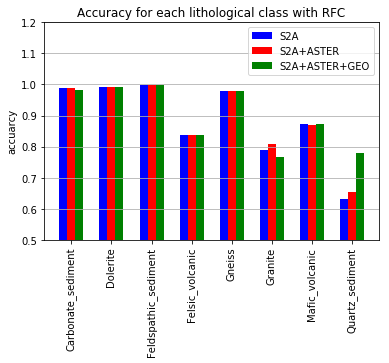

In [60]:
acc_cls_s = acc_cls(p1, tst_Y)
acc_cls_sa = acc_cls(p2, tst_Y)
acc_cls_sag = acc_cls(p3, tst_Y)
ax = plt.subplot(111)
plt.ylim(0.5, 1.2)
ax.bar(np.arange(8)-0.2, acc_cls_s[2:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(8), acc_cls_sa[2:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(8)+0.2, acc_cls_sag[2:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(8), cls_names[2:], rotation=90)
plt.ylabel('accuarcy')
plt.gca().yaxis.grid(True)
plt.title('Accuracy for each lithological class with RFC')
plt.legend()

#### SVM

In [46]:
clf = SVC(kernel='rbf')

In [51]:
clf.fit(trn_X[:, :], trn_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
p3 = clf.predict(tst_X[:, :])

In [22]:
clf.score(tst_X[:, :16], tst_Y)

0.42999999999999999

In [23]:
np.unique(tst_Y)

array([ 0.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

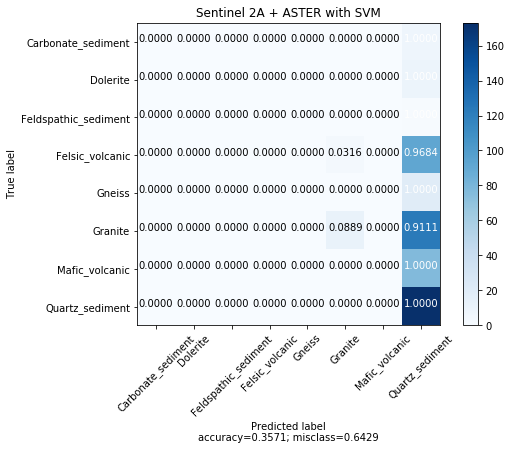

In [25]:
cm = metrics.confusion_matrix(tst_Y, preds, labels=np.asarray(np.unique(tst_Y), dtype=np.int)[1:])
plot_confusion_matrix(cm, target_names=[cls_names[i] for i in np.asarray(np.unique(tst_Y), dtype=np.int)[1:]], 
                      normalize=True, title='Sentinel 2A + ASTER with SVM')

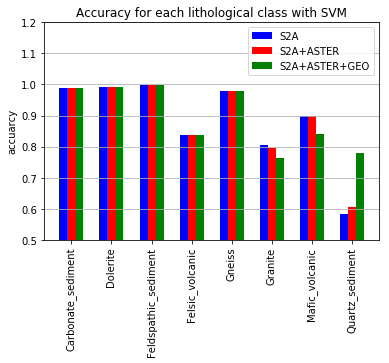

In [53]:
acc_cls_s = acc_cls(p1, tst_Y)
acc_cls_sa = acc_cls(p2, tst_Y)
acc_cls_sag = acc_cls(p3, tst_Y)
ax = plt.subplot(111)
plt.ylim(0.5, 1.2)
ax.bar(np.arange(8)-0.2, acc_cls_s[2:], width=0.2, color='b', align='center', label='S2A')
ax.bar(np.arange(8), acc_cls_sa[2:], width=0.2, color='r', align='center', label='S2A+ASTER')
ax.bar(np.arange(8)+0.2, acc_cls_sag[2:], width=0.2, color='g', align='center', label='S2A+ASTER+GEO')
plt.xticks(np.arange(8), cls_names[2:], rotation=90)
plt.ylabel('accuarcy')
plt.gca().yaxis.grid(True)
plt.title('Accuracy for each lithological class with SVM')
plt.legend()